# CelebA 人脸图像数据下载

In [1]:
import torchvision.datasets

In [2]:
# 下载
# mnist_dataset = torchvision.datasets.CelebA(root='.', download=True)

In [3]:
import h5py
import zipfile
import imageio.v3 as iio
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 生成分成结构数据格式
hdf5_file = r".//celeba//celeba_aligned_small.h5py"
celebadat = r".//celeba//img_align_celeba.zip"
# print(os.path.exists(celebadat))
# 从 202,599 个图像中提取一部分图像进行训练
total_images = 20000    # 设定训练数据集的大小
if not os.path.exists(hdf5_file):
    with h5py.File(hdf5_file, "w") as hf:

        count = 0

        with zipfile.ZipFile(celebadat, "r") as zf:
            # ofile = zf.extract("img_align_celeba/000001.jpg")
            # img = imageio.imread(ofile)
            
            for i in zf.namelist():
                # print(i)
                if i[-4:] == ".jpg":
                    ofile = zf.extract(i)   # 解压单个文件，返回文件绝对路劲
                    img = iio.imread(ofile) # 读取文件数据
                    os.remove(ofile)        # 移除文件 

                    # 创建一个数据集用gzip方式压缩，compression_opts设置--越大压缩越多
                    hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
                    
                    count += 1

                    if (count%1000 == 0):
                        print("images done .. ", count)

                    if (count == total_images):
                        break

images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000


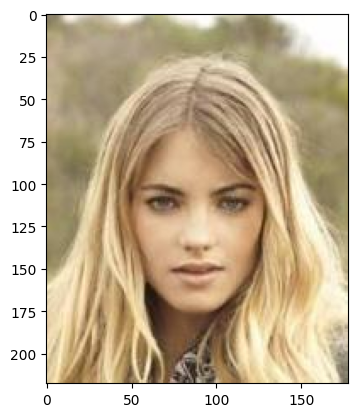

In [5]:
f = h5py.File(hdf5_file, "r")
plt.imshow(np.array(f["img_align_celeba"]["18.jpg"]))
f.close()